In [14]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_parquet("../../../0-1.parquet")

In [3]:
df[("DijetPt", 0)]

0       87.703466
1      112.267220
2      226.914213
3       40.016640
4      141.620213
          ...    
697     91.043407
698    411.384886
699     44.365678
700     68.834194
701     51.242398
Name: (DijetPt, 0), Length: 702, dtype: float64

In [4]:
df["ak8FatJetMsd"]

,0,1
0,121.684950,104.636199
1,113.792016,3.936330
2,103.741621,115.359435
3,98.031661,110.867741
4,127.274553,131.867805
...,...,...
697,141.357199,168.901449
698,109.457064,107.874160
699,90.489762,123.436558
700,79.155652,142.973935


In [15]:
preds = {"": np.load("testBDT/2017_preds.npy")}

from hh_vars import jec_shifts, jmsr_shifts

for jshift in jec_shifts + jmsr_shifts:
    preds[jshift] = np.load(f"testBDT/2017_preds_{jshift}.npy")

In [23]:
vals = [val[:150] for val in preds.values()]
diffs = [np.abs(val - vals[0]) for val in vals[1:]]
stds = np.std(vals, axis=0)
max_diffs = np.max(diffs, axis=0)

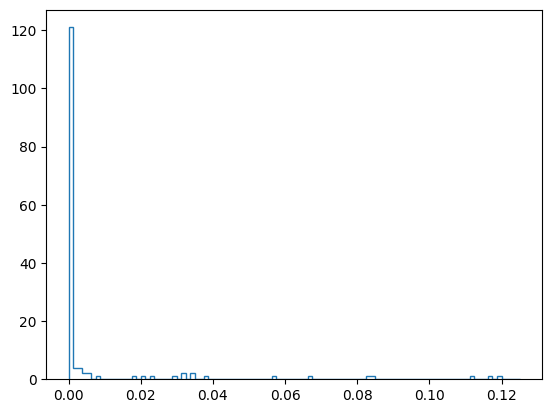

In [22]:
import matplotlib.pyplot as plt

_ = plt.hist(stds, np.linspace(0, 0.125, 101), histtype="step")

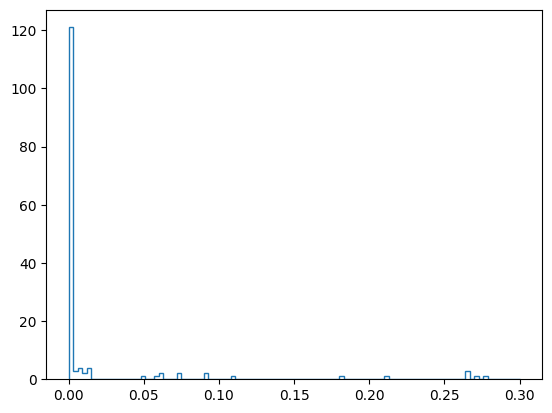

In [27]:
_ = plt.hist(max_diffs, np.linspace(0, 0.3, 101), histtype="step")

In [33]:
np.where(max_diffs > 0.25)

(array([  0,  13,  21,  58, 107]),)

In [32]:
{key: val[[np.where(max_diffs > 0.25)]] for key, val in preds.items()}

{'': array([[[0.69032097, 0.8181396 , 0.55155754, 0.46796584, 0.50105894]]],
       dtype=float32),
 'JES_up': array([[[0.8856665 , 0.8181396 , 0.8181396 , 0.46796584, 0.7772715 ]]],
       dtype=float32),
 'JES_down': array([[[0.41815436, 0.55155754, 0.3239958 , 0.2019883 , 0.2710255 ]]],
       dtype=float32),
 'JER_up': array([[[0.69032097, 0.8181396 , 0.55155754, 0.46796584, 0.50105894]]],
       dtype=float32),
 'JER_down': array([[[0.64841515, 0.8181396 , 0.55155754, 0.46796584, 0.50105894]]],
       dtype=float32),
 'JMS_up': array([[[0.69032097, 0.8181396 , 0.55155754, 0.46796584, 0.50105894]]],
       dtype=float32),
 'JMS_down': array([[[0.69032097, 0.8181396 , 0.55155754, 0.46796584, 0.50105894]]],
       dtype=float32),
 'JMR_up': array([[[0.69032097, 0.8181396 , 0.55155754, 0.46796584, 0.50105894]]],
       dtype=float32),
 'JMR_down': array([[[0.69032097, 0.8181396 , 0.55155754, 0.46796584, 0.50105894]]],
       dtype=float32)}